In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings('ignore')

## **Context**

Sebuah perusahaan bergerak di bidang jual-beli Perumahan ingin mengetahui gambaran umum tentang harga penjualan Rumah. Terdapat sebuah dataset yang menunjukan detail dari harga rumah berdasarkan spesifikasi fasilitas rumah. Dari dataset tersebut, perusahaan ingin bisa mendapatkan insight yang dapat dijalankan, sehingga nantinya dapat menetapkan strategi harga yang optimum berdasarkan kebutuhan pelanggan.

## **Dataset Information**

Sumber Dataset: https://www.kaggle.com/datasets/egebozoglu/house-price-linear-regression

Dataset yang dimiliki memiliki 21612 data harga rumah dan 21 fitur (kolom).
From This information we frame the problem :
1. Problem Statements : How might we predict price that will be used by the business so we can choose the optimum price for the customer ?
1. Data :
  1. Label : Price
1. ML Objective : Optimize the amount of price house.


In [2]:
df = pd.read_csv('housepractice.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [7]:
# Check Some Info

listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, len(df),df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
dfDesc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,id,int64,21613,0,0.0,21436,"[8682301600, 6815100380]"
1,date,datetime64[ns],21613,0,0.0,372,"[2015-03-19T00:00:00.000000000, 2015-01-26T00:..."
2,price,float64,21613,0,0.0,4028,"[955500.0, 832600.0]"
3,bedrooms,int64,21613,0,0.0,13,"[4, 6]"
4,bathrooms,float64,21613,0,0.0,30,"[1.5, 2.75]"
5,sqft_living,int64,21613,0,0.0,1038,"[5530, 3691]"
6,sqft_lot,int64,21613,0,0.0,9782,"[20450, 16672]"
7,floors,float64,21613,0,0.0,6,"[1.5, 3.5]"
8,waterfront,int64,21613,0,0.0,2,"[1, 0]"
9,view,int64,21613,0,0.0,5,"[3, 2]"


In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df.drop(columns = ['id','zipcode'], inplace = True)

In [10]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [11]:
pickup_dt = df['date'].dt

In [12]:
df['year'] = pickup_dt.year ## Mengambil tahun
df['month'] = pickup_dt.month ## Mengambil bulan
df['day'] = pickup_dt.day ## Mengambil tanggal

In [13]:
df.drop(columns = 'date', inplace = True)

In [14]:
# Uji normalitas

from scipy.stats import shapiro

norm, pval = shapiro(df['price'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('DATA TIDAK BERDISTRIBUSI NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('DATA BERDISTRIBUSI NORMAL')

Tolak H0 Karena P-Value (0.0 < 5%)
DATA TIDAK BERDISTRIBUSI NORMAL


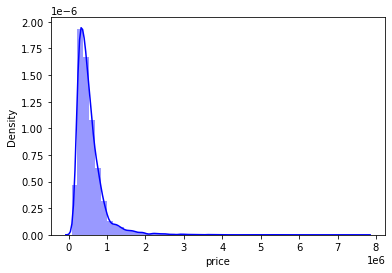

In [15]:
sns.distplot(df['price'], color = 'blue')
plt.show()

<AxesSubplot:>

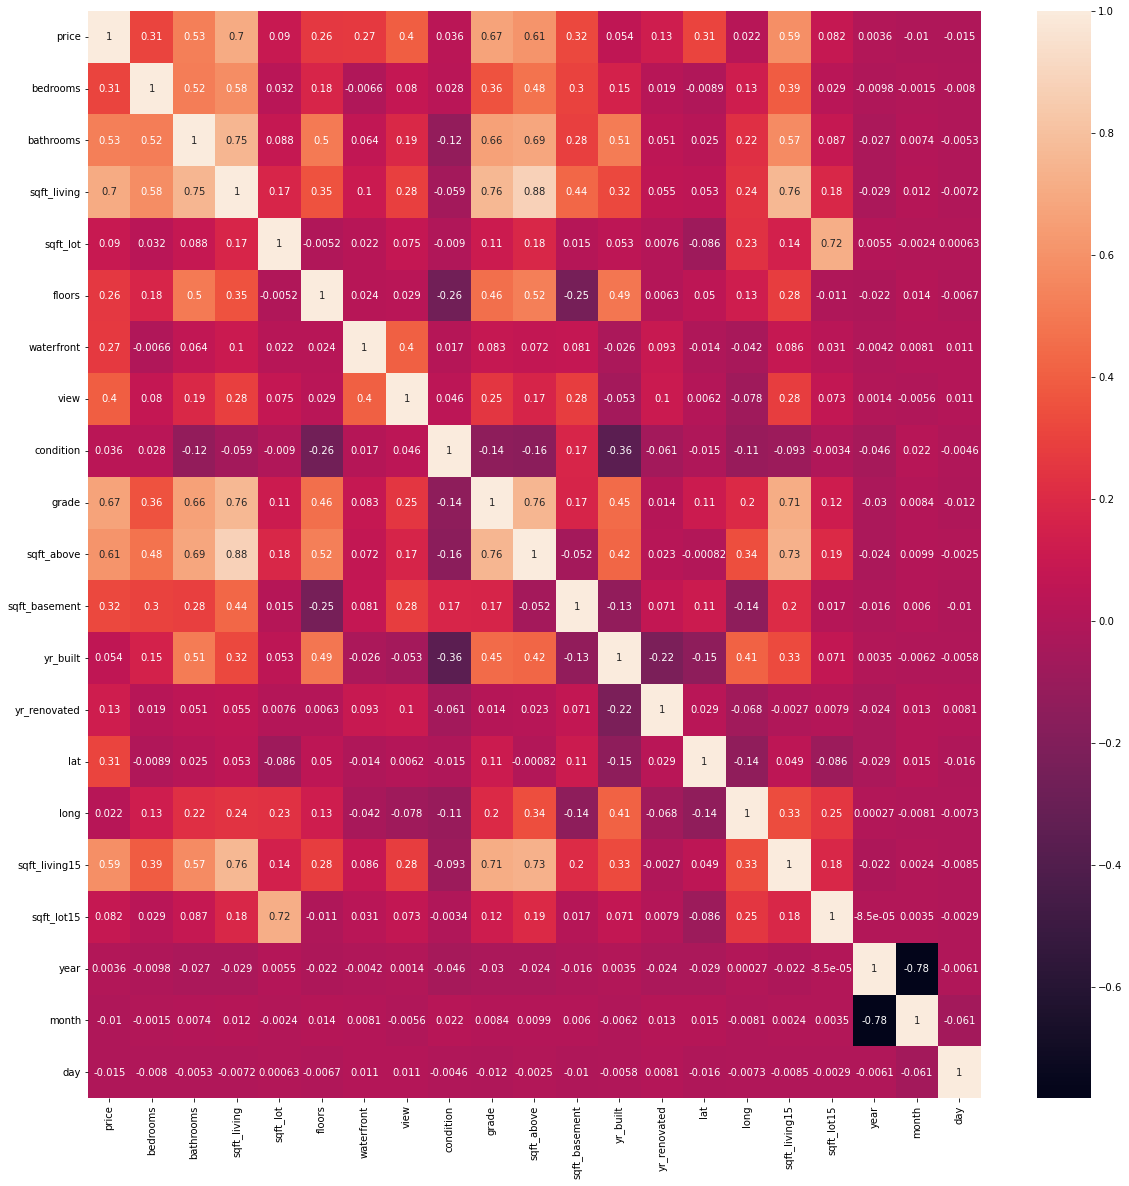

In [16]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr('pearson'), annot=True)

In [17]:
df.drop(columns=['year', 'month', 'day'], inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [18]:
## SPlitting

In [19]:
X = df.drop(columns = ['price'])
y = df['price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = .80, random_state = 42)

In [21]:
X_train.shape

(17290, 17)

In [22]:
def Eva_Matrix_DF(model, X_train, X_test, y_train, y_test, Nama):
    Model = model.fit(X_train, y_train)
    y_pred_tr = Model.predict(X_train)
    R2_tr = r2_score(y_train, y_pred_tr)
    MAE_tr = mean_absolute_error(y_train, y_pred_tr)
    MSE_tr = mean_squared_error(y_train, y_pred_tr)
    RMSE_tr = np.sqrt(MSE_tr)
    y_pred_ts = Model.predict(X_test)
    R2_ts = r2_score(y_test, y_pred_ts)
    MAE_ts = mean_absolute_error(y_test, y_pred_ts)
    MSE_ts = mean_squared_error(y_test, y_pred_ts)
    RMSE_ts = np.sqrt(MSE_ts)
    data = {
    "Training " + Nama : [R2_tr, MAE_tr, MSE_tr, RMSE_tr],
    "Testing " + Nama: [R2_ts, MAE_ts, MSE_ts, RMSE_ts]}
    df = pd.DataFrame(data = data, index = ['R2', 'MAE', 'MSE', 'RMSE'])
    return df

In [23]:
df_LinReg = Eva_Matrix_DF(LinearRegression(fit_intercept=False), X_train, X_test, y_train, y_test, "LinReg")

In [24]:
df_LinReg

,Training LinReg,Testing LinReg
R2,6.883756e-01,6.855015e-01
MAE,1.263423e+05,1.304026e+05
MSE,4.071329e+10,4.754485e+10
RMSE,2.017753e+05,2.180478e+05


In [25]:
df_Lasso = Eva_Matrix_DF(Lasso(), X_train, X_test, y_train, y_test, "Lasso")

In [26]:
df_Lasso

,Training Lasso,Testing Lasso
R2,6.951039e-01,6.957271e-01
MAE,1.253688e+05,1.281572e+05
MSE,3.983425e+10,4.599897e+10
RMSE,1.995852e+05,2.144737e+05


In [27]:
df_Ridge = Eva_Matrix_DF(Ridge(), X_train, X_test, y_train, y_test, "Ridge")

In [28]:
df_Ridge

,Training Ridge,Testing Ridge
R2,6.951021e-01,6.956672e-01
MAE,1.253594e+05,1.281550e+05
MSE,3.983449e+10,4.600803e+10
RMSE,1.995858e+05,2.144948e+05


In [29]:
df_ElasticNet = Eva_Matrix_DF(ElasticNet(), X_train, X_test, y_train, y_test, "ElasticNet")

In [30]:
df_ElasticNet

,Training ElasticNet,Testing ElasticNet
R2,6.210047e-01,6.146973e-01
MAE,1.440539e+05,1.489119e+05
MSE,4.951521e+10,5.824879e+10
RMSE,2.225201e+05,2.413479e+05


In [31]:
pd.concat([df_LinReg, df_Ridge, df_Lasso, df_ElasticNet], axis = 1).T.sort_values('R2', ascending =False)

,R2,MAE,MSE,RMSE
Testing Lasso,0.695727,128157.164960,4.599897e+10,214473.711323
Testing Ridge,0.695667,128155.039314,4.600803e+10,214494.816278
Training Lasso,0.695104,125368.780139,3.983425e+10,199585.204309
Training Ridge,0.695102,125359.424591,3.983449e+10,199585.805993
Training LinReg,0.688376,126342.332198,4.071329e+10,201775.344881
Testing LinReg,0.685501,130402.613929,4.754485e+10,218047.821557
Training ElasticNet,0.621005,144053.864482,4.951521e+10,222520.144913
Testing ElasticNet,0.614697,148911.873298,5.824879e+10,241347.863229


In [32]:
## Scalling

In [36]:
scaler = RobustScaler()
sc_train = scaler.fit_transform(X_train)
X_train_sc = pd.DataFrame(sc_train)
X_train_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,-0.50,-0.117117,0.980287,-0.5,0.0,0.0,1.0,2.0,0.220,0.000000,0.173913,0.0,-0.994175,0.387255,1.034091,1.104171
1,-1.0,-1.25,-0.819820,-0.695745,-0.5,0.0,0.0,0.0,-1.0,-0.760,0.363636,-1.000000,0.0,-0.096117,-0.289216,-0.647727,-0.526899
2,0.0,-1.25,-0.747748,-0.020337,0.0,0.0,0.0,0.0,-1.0,-0.570,0.163636,-0.717391,0.0,-0.427184,-0.509804,-0.761364,0.037276
3,0.0,0.00,0.162162,-0.017840,-0.5,0.0,0.0,1.0,0.0,-0.280,1.472727,0.043478,0.0,-0.857767,0.289216,-0.045455,-0.053395
4,-1.0,0.25,-0.152252,-1.099099,0.5,0.0,0.0,0.0,1.0,-0.114,0.536364,0.695652,0.0,0.643204,0.107843,0.284091,0.572033


In [37]:
sc_test = scaler.transform(X_test)
X_test_sc = pd.DataFrame(sc_test)
X_test_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,0.00,0.144144,0.230666,0.5,0.0,0.0,1.0,1.0,0.51,0.000000,0.239130,0.0,-0.645631,0.338235,0.625000,0.017127
1,2.0,0.75,0.891892,-0.155205,-0.5,0.0,0.0,2.0,1.0,0.27,1.945455,0.043478,0.0,0.517476,-0.264706,0.602273,-0.268386
2,1.0,0.25,1.675676,0.587459,0.5,0.0,2.0,0.0,4.0,2.21,0.000000,0.478261,0.0,-0.034951,0.500000,2.125000,0.417086
3,0.0,1.25,2.387387,1.250201,0.5,0.0,2.0,0.0,5.0,3.00,0.000000,0.326087,0.0,0.619903,0.014706,2.511364,1.332057
4,0.0,0.25,0.576577,-0.396753,0.5,0.0,0.0,0.0,2.0,0.99,0.000000,0.630435,0.0,0.450971,0.725490,0.465909,-0.718316


In [38]:
df_LinReg_sc = Eva_Matrix_DF(LinearRegression(fit_intercept=False), X_train_sc, X_test_sc, y_train, y_test, "LinReg_sc")
df_Lasso_sc = Eva_Matrix_DF(Lasso(), X_train_sc, X_test_sc, y_train, y_test, "Lasso_sc")
df_Ridge_sc = Eva_Matrix_DF(Ridge(), X_train_sc, X_test_sc, y_train, y_test, "Ridge_sc")
df_ElasticNet_sc = Eva_Matrix_DF(ElasticNet(), X_train_sc, X_test_sc, y_train, y_test, "ElasticNet_sc")

In [39]:
pd.concat([df_LinReg_sc, df_Ridge_sc, df_Lasso_sc, df_ElasticNet_sc], axis = 1).T.sort_values('R2', ascending =False)

,R2,MAE,MSE,RMSE
Testing LinReg_sc,0.695730,128157.320462,4.599856e+10,214472.755559
Testing Lasso_sc,0.695729,128157.553518,4.599872e+10,214473.129547
Testing Ridge_sc,0.695683,128160.757177,4.600564e+10,214489.263023
Training LinReg_sc,0.695104,125369.434687,3.983425e+10,199585.203604
Training Lasso_sc,0.695104,125369.519494,3.983425e+10,199585.204138
Training Ridge_sc,0.695103,125366.467020,3.983443e+10,199585.644591
Training ElasticNet_sc,0.631736,129414.984903,4.811321e+10,219347.240258
Testing ElasticNet_sc,0.623251,133511.975624,5.695573e+10,238653.989470


In [40]:
## Polynomial

In [41]:
poly = PolynomialFeatures(degree=3, include_bias=False)

In [42]:
yeo_pow = PowerTransformer(method='yeo-johnson')

In [43]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [48]:
num_poly = poly.fit_transform(X)

In [49]:
num_pow = yeo_pow.fit_transform(num_poly)

In [50]:
df_pow = pd.DataFrame(num_pow)

In [51]:
df_pow.head()

,0,1,2,3,4,5,6,7,8,9,...,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138
0,-0.352407,-1.571853,-1.121655,-0.331682,-0.975610,-0.087173,-0.330128,-0.597793,-0.514360,-0.736211,...,-0.277553,-1.0,-1.0,1.043235,0.650442,0.341851,-1.043176,-1.0,-1.0,-1.0
1,-0.352407,0.250882,0.706456,-0.032289,1.029432,-0.087173,-0.330128,-0.597793,-0.514360,0.704345,...,-0.752505,-1.0,-1.0,0.292879,0.057854,-0.058200,-0.293981,-1.0,-1.0,-1.0
2,-1.605435,-1.571853,-2.107060,0.336051,-0.975610,-0.087173,-0.330128,-0.597793,-1.565624,-1.873838,...,-0.098368,-1.0,-1.0,-1.122738,-0.483286,-0.126609,1.121903,-1.0,-1.0,-1.0
3,0.722633,1.136536,0.065492,-0.484436,-0.975610,-0.087173,-0.330128,2.081039,-0.514360,-1.036202,...,-1.342874,-1.0,-1.0,0.992330,0.774237,0.510218,-0.994131,-1.0,-1.0,-1.0
4,-0.352407,-0.072697,-0.296964,0.095276,-0.975610,-0.087173,-0.330128,-0.597793,0.378270,0.123846,...,1.219792,-1.0,-1.0,0.099552,0.012380,-0.033634,-0.097272,-1.0,-1.0,-1.0


In [54]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_pow, y, train_size =0.80, random_state =42)

In [55]:
df_LinReg2 = Eva_Matrix_DF(LinearRegression(fit_intercept=False), X_train_1, X_test_1, y_train_1, y_test_1, "LinReg2")
df_Ridge2 = Eva_Matrix_DF(Ridge(), X_train_1, X_test_1, y_train_1, y_test_1, "Ridge")
df_Lasso2 = Eva_Matrix_DF(Lasso(), X_train_1, X_test_1, y_train_1, y_test_1, "Lasso")
df_ElasticNet2 = Eva_Matrix_DF(ElasticNet(), X_train_1, X_test_1, y_train_1, y_test_1, "ElasticNet")


In [56]:
pd.concat([df_LinReg2, df_Ridge2, df_Lasso2, df_ElasticNet2], axis = 1).T.sort_values('R2', ascending =False)

,R2,MAE,MSE,RMSE
Training LinReg2,0.868844,83878.388722,1.713538e+10,1.309022e+05
Training Ridge,0.776877,108038.455285,2.915073e+10,1.707359e+05
Training Lasso,0.756496,112766.070891,3.181344e+10,1.783632e+05
Testing Ridge,0.753545,113280.708330,3.725819e+10,1.930238e+05
Testing Lasso,0.741250,117713.572050,3.911694e+10,1.977800e+05
Training ElasticNet,0.656742,128280.767504,4.484616e+10,2.117691e+05
Testing ElasticNet,0.648276,132484.329042,5.317245e+10,2.305915e+05
Testing LinReg2,-13.472315,140617.261855,2.187877e+12,1.479147e+06


In [57]:
## Scalling Polym variables data

In [58]:
P_sc_train = scaler.fit_transform(X_train_1)
X_train_P_sc = pd.DataFrame(P_sc_train)
X_train_P_sc.head()

,0,1,2,3,4,5,6,7,8,9,...,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138
0,0.000000,-0.498202,-0.122584,0.680781,-0.622997,0.0,0.0,1.0,1.864791,0.216215,...,0.378934,0.0,0.0,-0.826631,-0.956284,-0.742129,0.824826,0.0,0.0,0.0
1,-1.165564,-1.366398,-1.116139,-1.017844,-0.622997,0.0,0.0,0.0,-1.177715,-1.201903,...,-0.294894,0.0,0.0,0.832819,0.856963,0.636179,-0.832302,0.0,0.0,0.0
2,0.000000,-1.366398,-0.984476,-0.019950,0.000000,0.0,0.0,0.0,-1.177715,-0.798031,...,-0.526900,0.0,0.0,1.026742,0.436628,-0.034917,-1.026283,0.0,0.0,0.0
3,0.000000,0.000000,0.156976,-0.017481,-0.622997,0.0,0.0,1.0,0.000000,-0.336865,...,0.284685,0.0,0.0,0.047346,0.031544,0.052194,-0.047371,0.0,0.0,0.0
4,-1.165564,0.231105,-0.161060,-2.586515,0.377003,0.0,0.0,0.0,1.000000,-0.127396,...,0.107329,0.0,0.0,-0.270910,-0.482611,-0.443740,0.269873,0.0,0.0,0.0


In [59]:
P_sc_test = scaler.transform(X_test_1)
X_test_P_sc = pd.DataFrame(P_sc_test)
X_test_P_sc.head()

,0,1,2,3,4,5,6,7,8,9,...,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138
0,1.000000,0.000000,0.140197,0.203987,0.377003,0.0,0.000000,1.000000,1.000000,0.455600,...,0.331950,0.0,0.0,-0.546768,-0.310838,-0.015279,0.545517,0.0,0.0,0.0
1,1.885199,0.663923,0.731275,-0.162141,-0.622997,0.0,0.000000,1.685406,1.000000,0.260782,...,-0.269499,0.0,0.0,-0.530733,-0.094120,0.284007,0.528498,0.0,0.0,0.0
2,1.000000,0.231105,1.195129,0.458371,0.377003,0.0,3.360475,0.000000,3.297581,1.327797,...,0.485936,0.0,0.0,-1.394309,-0.954084,-0.338794,1.391357,0.0,0.0,0.0
3,0.000000,1.063928,1.533630,0.809171,0.377003,0.0,3.360475,0.000000,3.902033,1.580131,...,0.014719,0.0,0.0,-1.554006,-1.370879,-0.848958,1.549946,0.0,0.0,0.0
4,0.000000,0.231105,0.505132,-0.471922,0.377003,0.0,0.000000,0.000000,1.864791,0.772857,...,0.695578,0.0,0.0,-0.422837,0.440617,0.977463,0.422527,0.0,0.0,0.0


In [60]:
df_LinReg_P_sc = Eva_Matrix_DF(LinearRegression(fit_intercept=False), X_train_P_sc, X_test_P_sc, y_train_1, y_test_1, "LinReg_Psc")
df_Ridge_P_sc = Eva_Matrix_DF(Ridge(), X_train_P_sc, X_test_P_sc, y_train_1, y_test_1, "Ridge_Psc")
df_Lasso_P_sc = Eva_Matrix_DF(Lasso(), X_train_P_sc, X_test_P_sc, y_train_1, y_test_1, "Lasso_Psc")
df_ElasticNet_P_sc = Eva_Matrix_DF(ElasticNet(), X_train_P_sc, X_test_P_sc, y_train_1, y_test_1, "ElasticNet_Psc")

In [61]:
pd.concat([df_LinReg_P_sc, df_Ridge_P_sc, df_Lasso_P_sc, df_ElasticNet_P_sc], axis = 1).T.sort_values('R2', ascending =False)

,R2,MAE,MSE,RMSE
Training LinReg_Psc,0.868752,83912.715581,1.714733e+10,1.309478e+05
Training Ridge_Psc,0.772780,108921.086919,2.968592e+10,1.722960e+05
Training Lasso_Psc,0.756482,112764.798044,3.181534e+10,1.783685e+05
Testing Ridge_Psc,0.752909,113862.113914,3.735443e+10,1.932729e+05
Testing Lasso_Psc,0.741248,117709.588689,3.911720e+10,1.977807e+05
Training ElasticNet_Psc,0.644958,130173.999026,4.638571e+10,2.153734e+05
Testing ElasticNet_Psc,0.638405,134314.661326,5.466478e+10,2.338050e+05
Testing LinReg_Psc,-12.626440,139165.309821,2.060000e+12,1.435270e+06


In [71]:
Alpha = np.arange(0, 0.1, 0.001)

In [72]:
train_r = []
test_r = []

for i in Alpha:
    Model_R = Ridge(alpha =i)
    Model_R.fit(X_train_P_sc, y_train_1)
    y_pred_tr = Model_R.predict(X_train_P_sc)
    R2_train = r2_score(y_train_1, y_pred_tr)
    train_r.append(R2_train)
    y_pred_test = Model_R.predict(X_test_P_sc)
    R2_test = r2_score(y_test_1, y_pred_test)
    test_r.append(R2_test)

<function matplotlib.pyplot.show(close=None, block=None)>

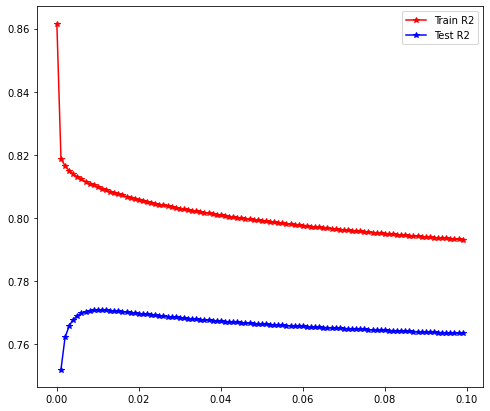

In [74]:
plt.figure(figsize=(8,7))
plt.plot(Alpha, train_r, 'r*-')
plt.plot(Alpha[1:], test_r[1:], 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.show

In [75]:
np.max(test_r)

0.7706440550442781

In [77]:
Alpha[np.argmax(test_r)]

0.01

In [78]:
df_Ridge_Tune = Eva_Matrix_DF(Ridge(alpha=0.01), X_train_P_sc, X_test_P_sc, y_train_1, y_test_1, "Ridge_Tune")

In [79]:
df_Ridge_Tune

,Training Ridge_Tune,Testing Ridge_Tune
R2,8.097109e-01,7.706441e-01
MAE,9.825380e+04,1.054323e+05
MSE,2.486100e+10,3.467328e+10
RMSE,1.576737e+05,1.862076e+05
